### Exercise 11

This plot displays a histogram of a randomly generated dataset with normal distribution.
This plot displays a histogram of a randomly generated dataset with normal distribution and an outlier.


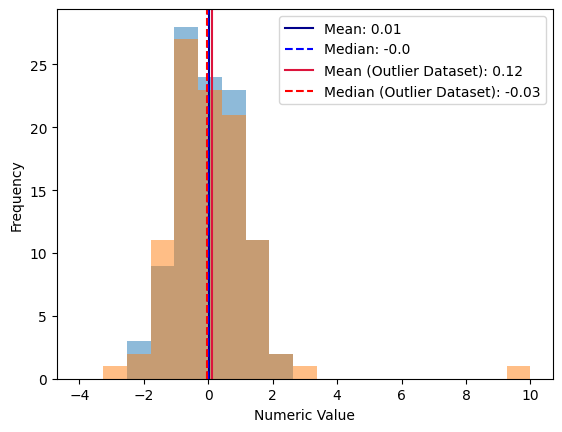

In [1]:
import numpy as np
import matplotlib.pyplot as plt

simdat = np.random.normal(0,1,100)
sim_mean = round(simdat.mean(),2)
sim_median = round(np.median(simdat),2)
sim_std = np.std(simdat)

outlierdat = np.random.normal(0,1,99)
outlierdat = np.append(outlierdat,10)
outlier_mean = round(outlierdat.mean(),2)
outlier_median = round(np.median(outlierdat),2)
outlier_std = np.std(outlierdat)

print("This plot displays a histogram of a randomly generated dataset with normal distribution.")

bins = np.linspace(-4, 10, 20)

plt.hist(simdat, bins, alpha = 0.5)
plt.axvline(sim_mean, c='darkblue', label='Mean: ' + str(sim_mean))
plt.axvline(sim_median, c='blue', label='Median: ' + str(sim_median), linestyle = '--')
plt.xlabel("Numeric Value")
plt.ylabel("Frequency")
plt.legend()

print("This plot displays a histogram of a randomly generated dataset with normal distribution and an outlier.")
plt.hist(outlierdat, bins, alpha = 0.5)
plt.axvline(outlier_mean, c='crimson', label='Mean (Outlier Dataset): ' + str(outlier_mean))
plt.axvline(outlier_median, c='red', label='Median (Outlier Dataset): ' + str(outlier_median), linestyle = '--')
plt.xlabel("Numeric Value")
plt.ylabel("Frequency")
plt.legend()

### Exercise 12.1

In [2]:
import pandas as pd
import math
import scipy.stats as st

incomedat = pd.read_csv("incomedat.csv",sep=',',header=None)

incomes = incomedat[2].values.tolist()
above_50k = [0,0]
below_50k = [0,0]

for index,i in enumerate(incomes):
    if i > 50000:
        if incomedat[13].iloc[index] == " United-States":
            above_50k[0] = above_50k[0] + 1
        else:
            above_50k[1] = above_50k[1] + 1
    else:
        if incomedat[13].iloc[index] == " United-States":
            below_50k[0] = below_50k[0] + 1
        else:
            below_50k[1] = below_50k[1] + 1

income_states = pd.DataFrame({"<=50k" : below_50k, ">50k" : above_50k})
income_states.index = ["United-States", "Other Countries"]

fisher_test_result = st.fisher_exact(income_states)
if float(fisher_test_result.pvalue) < 0.05:
    print("Fisher's exact test is SIGNIFICANT for this dataset at a threshold of 0.05. The p-value for this test is " + str(float(fisher_test_result.pvalue)) + ". There is a significant association between income (whether this individual earns > $50K or <=$50K per year) and US citizenship in this dataset.")
else:
    print("Fisher's exact test is NOT significant for this dataset at a threshold of 0.05. The p-value for this test is " + str(float(fisher_test_result.pvalue)) + ". There is NOT a significant association between income (whether this individual earns > $50K or <=$50K per year) and US citizenship in this dataset.")

Fisher's exact test is SIGNIFICANT for this dataset at a threshold of 0.05. The p-value for this test is 5.466984829892621e-30. There is a significant association between income (whether this individual earns > $50K or <=$50K per year) and US citizenship in this dataset.


### Exercise 12.2

This plot displays a histogram showing the ages of United States Citizens sampled in this dataset.


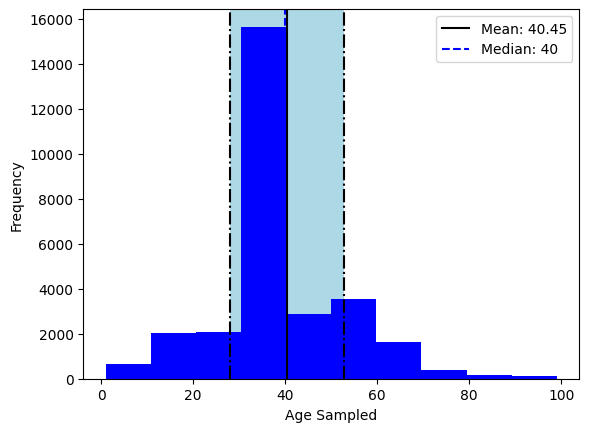

This plot displays a histogram showing the ages of non-United States Citizens sampled in this dataset.


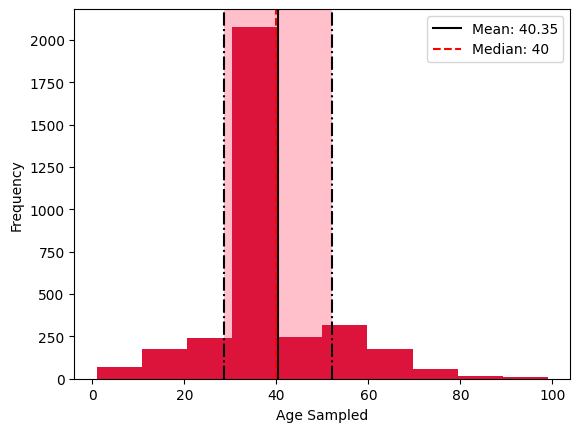

There is NOT a significant association between country of origin and age sampled in this dataset. The p-value for this test is 0.6589109552163607.


In [35]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statistics

incomedat = pd.read_csv("incomedat.csv",sep=',',header=None)
ages = incomedat[12].values.tolist()

us_ages = []
non_us_ages = []

for index, i in enumerate(ages):
    if incomedat[13].iloc[index] == " United-States":
        us_ages.append(i)
    else:
        non_us_ages.append(i)

plt.hist(us_ages)
us_mean = round(statistics.mean(us_ages),2)
us_median = round(np.median(us_ages))
us_std = np.std(us_ages)

print("This plot displays a histogram showing the ages of United States Citizens sampled in this dataset.")
plt.hist(us_ages, color = "blue")
plt.axvline(us_mean-us_std, c='k', linestyle = '-.')
plt.axvline(us_mean+us_std, c='k', linestyle = '-.')
plt.axvspan(us_mean-us_std, us_mean+us_std, fc='lightblue', zorder=-10)
plt.axvline(us_mean, c='k', label='Mean: ' + str(us_mean))
plt.axvline(us_median, c='blue', label='Median: ' + str(us_median), linestyle = '--')
plt.xlabel("Age Sampled")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.hist(non_us_ages)
non_us_mean = round(statistics.mean(non_us_ages),2)
non_us_median = round(np.median(non_us_ages))
non_us_std = np.std(non_us_ages)

print("This plot displays a histogram showing the ages of non-United States Citizens sampled in this dataset.")
plt.hist(non_us_ages, color = "crimson")
plt.axvline(non_us_mean-non_us_std, c='k', linestyle = '-.')
plt.axvline(non_us_mean+non_us_std, c='k', linestyle = '-.')
plt.axvspan(non_us_mean-non_us_std, non_us_mean+non_us_std, fc='pink', zorder=-10)
plt.axvline(non_us_mean, c='k', label='Mean: ' + str(non_us_mean))
plt.axvline(non_us_median, c='red', label='Median: ' + str(non_us_median), linestyle = '--')
plt.xlabel("Age Sampled")
plt.ylabel("Frequency")
plt.legend()
plt.show()

t_test_result = st.ttest_ind(us_ages,non_us_ages)
t_test_result = float(t_test_result.pvalue)

if t_test_result > 0.05:
    print("There is NOT a significant association between country of origin and age sampled in this dataset. The p-value for this test is " + str(t_test_result) + ".")
else:
    print("There is a SIGNIFICANT association between country of origin and age sampled in this dataset. The p-value for this test is " + str(t_test_result) + ".")